In [1]:
"""
FEniCS tutorial demo program: Diffusion of a Gaussian hill.

  u'= Laplace(u) + f  in a square domain
  u = u_D             on the boundary
  u = u_0             at t = 0

  u_D = f = 0

The initial condition u_0 is chosen as a Gaussian hill.
"""

from __future__ import print_function
from fenics import *
import time

NameError: name 'interactive' is not defined

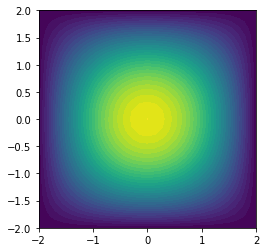

In [2]:
T = 2.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)
    plot(u)

    # Update previous solution
    u_n.assign(u)

# Hold plot
interactive()

In [15]:
bc.get_boundary_values()

{405: 0.0,
 350: 0.0,
 324: 0.0,
 299: 0.0,
 275: 0.0,
 252: 0.0,
 230: 0.0,
 189: 0.0,
 170: 0.0,
 152: 0.0,
 135: 0.0,
 119: 0.0,
 104: 0.0,
 90: 0.0,
 77: 0.0,
 65: 0.0,
 54: 0.0,
 20: 0.0,
 9: 0.0,
 5: 0.0,
 2: 0.0,
 495: 0.0,
 0: 0.0,
 525: 0.0,
 1: 0.0,
 554: 0.0,
 3: 0.0,
 582: 0.0,
 609: 0.0,
 10: 0.0,
 15: 0.0,
 660: 0.0,
 21: 0.0,
 707: 0.0,
 36: 0.0,
 6: 0.0,
 729: 0.0,
 45: 0.0,
 27: 0.0,
 750: 0.0,
 55: 0.0,
 770: 0.0,
 66: 0.0,
 789: 0.0,
 78: 0.0,
 91: 0.0,
 105: 0.0,
 840: 0.0,
 120: 0.0,
 855: 0.0,
 377: 0.0,
 136: 0.0,
 869: 0.0,
 635: 0.0,
 153: 0.0,
 882: 0.0,
 171: 0.0,
 894: 0.0,
 190: 0.0,
 905: 0.0,
 915: 0.0,
 924: 0.0,
 253: 0.0,
 209: 0.0,
 932: 0.0,
 35: 0.0,
 276: 0.0,
 939: 0.0,
 300: 0.0,
 945: 0.0,
 807: 0.0,
 325: 0.0,
 950: 0.0,
 351: 0.0,
 231: 0.0,
 954: 0.0,
 378: 0.0,
 957: 0.0,
 406: 0.0,
 959: 0.0,
 960: 0.0,
 958: 0.0,
 955: 0.0,
 951: 0.0,
 464: 0.0,
 946: 0.0,
 940: 0.0,
 210: 0.0,
 933: 0.0,
 684: 0.0,
 925: 0.0,
 434: 0.0,
 916: 0.0,
 906: 0

In [16]:
u.ufl_element()

FiniteElement('Lagrange', triangle, 1)

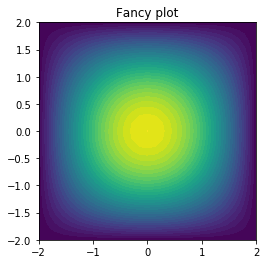

In [22]:
plot(u,
     wireframe = True,              # use wireframe rendering
     interactive = True,           # do not hold plot on screen
     scalarbar = False,             # hide the color mapping bar
     hardcopy_prefix = "myplot",    # default plotfile name
     scale = 2.0,                   # scale the warping/glyphs
     title = "Fancy plot",          # set your own title
     )

In [39]:
import numpy as np

In [40]:
u_array = np.array(u.vector())

In [42]:
import matplotlib.pyplot as plt

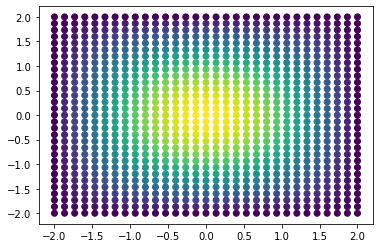

In [105]:
plt.scatter(V.tabulate_dof_coordinates()[:,0],
            V.tabulate_dof_coordinates()[:,1],
            c=u_array)

In [80]:
nodes_cordinates = V.tabulate_dof_coordinates()
nodes_cordinates

array([[-2.        ,  2.        ],
       [-2.        ,  1.86666667],
       [-1.86666667,  2.        ],
       ..., 
       [ 1.86666667, -2.        ],
       [ 2.        , -1.86666667],
       [ 2.        , -2.        ]])

In [100]:
u_array = np.array(u.vector())
u_array

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.00014335,
        0.        ,  0.        ,  0.0002854 ,  0.0002854 ,  0.        ,
        0.        ,  0.00042448,  0.00056804,  0.00042448,  0.        ,
        0.        ,  0.00055903,  0.00084472,  0.00084472,  0.00055903,
        0.        ,  0.        ,  0.00068755,  0.00111236,  0.00125603,
        0.00111236,  0.00068755,  0.        ,  0.        ,  0.00080861,
        0.00136798,  0.00165387,  0.00165387,  0.00136798,  0.00080861,
        0.        ,  0.        ,  0.00092087,  0.00160876,  0.00203381,
        0.00217757,  0.00203381,  0.00160876,  0.00092087,  0.        ,
        0.        ,  0.00102309,  0.00183204,  0.00239167,  0.0026777 ,
        0.0026777 ,  0.00239167,  0.00183204,  0.00102309,  0.        ,
        0.        ,  0.00111415,  0.00203533,  0.0027235 ,  0.00314874,
        0.00329257,  0.00314874,  0.0027235 ,  0.00203533,  0.00111415,
        0.        ,  0.        ,  0.00119303,  0.00221641,  0.00

In [83]:
mat_results = np.zeros((31,31))

In [98]:
for i in range(len(u_array)):
    x = np.where(np.abs(nodes_cordinates[i,0]-np.linspace(-2,2,31))<0.0001)[0][0]
    y = np.where(np.abs(nodes_cordinates[i,1]-np.linspace(-2,2,31))<0.0001)[0][0]
    mat_results[x,y]=u_array[i]

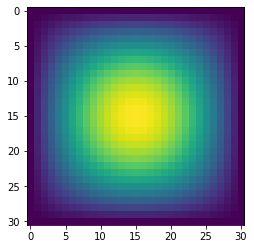

In [99]:
plt.imshow(mat_results)